In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import os


%matplotlib inline


2023-08-22 14:36:22.917990: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-22 14:36:22.960465: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-22 14:36:22.961245: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-22 14:36:23.802405: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
#pip install -U pip efficientnet

In [3]:
print(os.listdir('archive'))

['anno_train.csv', 'names.csv', 'anno_test.csv', 'car_data']


In [4]:
# Distribution graphs (histogram/bar) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]
# For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [5]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [6]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()



In [7]:
nRowsRead = 1000 
# specify 'None' if want to read whole file
# anno_test.csv has 8041 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('archive/anno_test.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'anno_test.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 6 columns


In [8]:
df1.head(10)

,00001.jpg,30,52,246,147,181
0,00002.jpg,100,19,576,203,103
1,00003.jpg,51,105,968,659,145
2,00004.jpg,67,84,581,407,187
3,00005.jpg,140,151,593,339,185
4,00006.jpg,20,77,420,301,78
5,00007.jpg,249,166,2324,1459,118
6,00008.jpg,119,215,1153,719,165
7,00009.jpg,1,7,275,183,32
8,00010.jpg,28,55,241,177,60
9,00011.jpg,30,20,438,253,49


In [9]:
plotPerColumnDistribution(df1, 10, 5)

<Figure size 2400x512 with 0 Axes>

/tmp/ipykernel_27380/128494285.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN
/tmp/ipykernel_27380/128494285.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


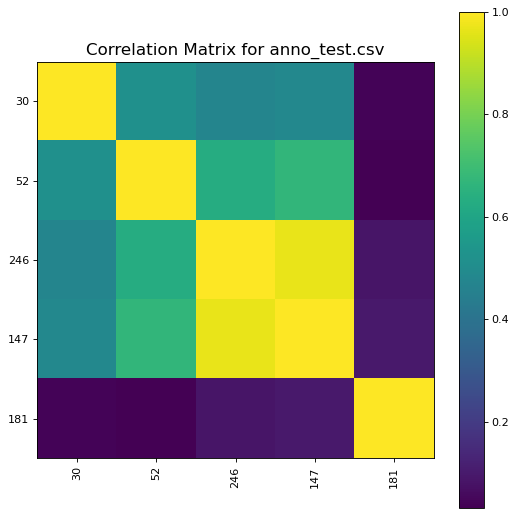

In [10]:
plotCorrelationMatrix(df1, 8)


/tmp/ipykernel_27380/2803739303.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


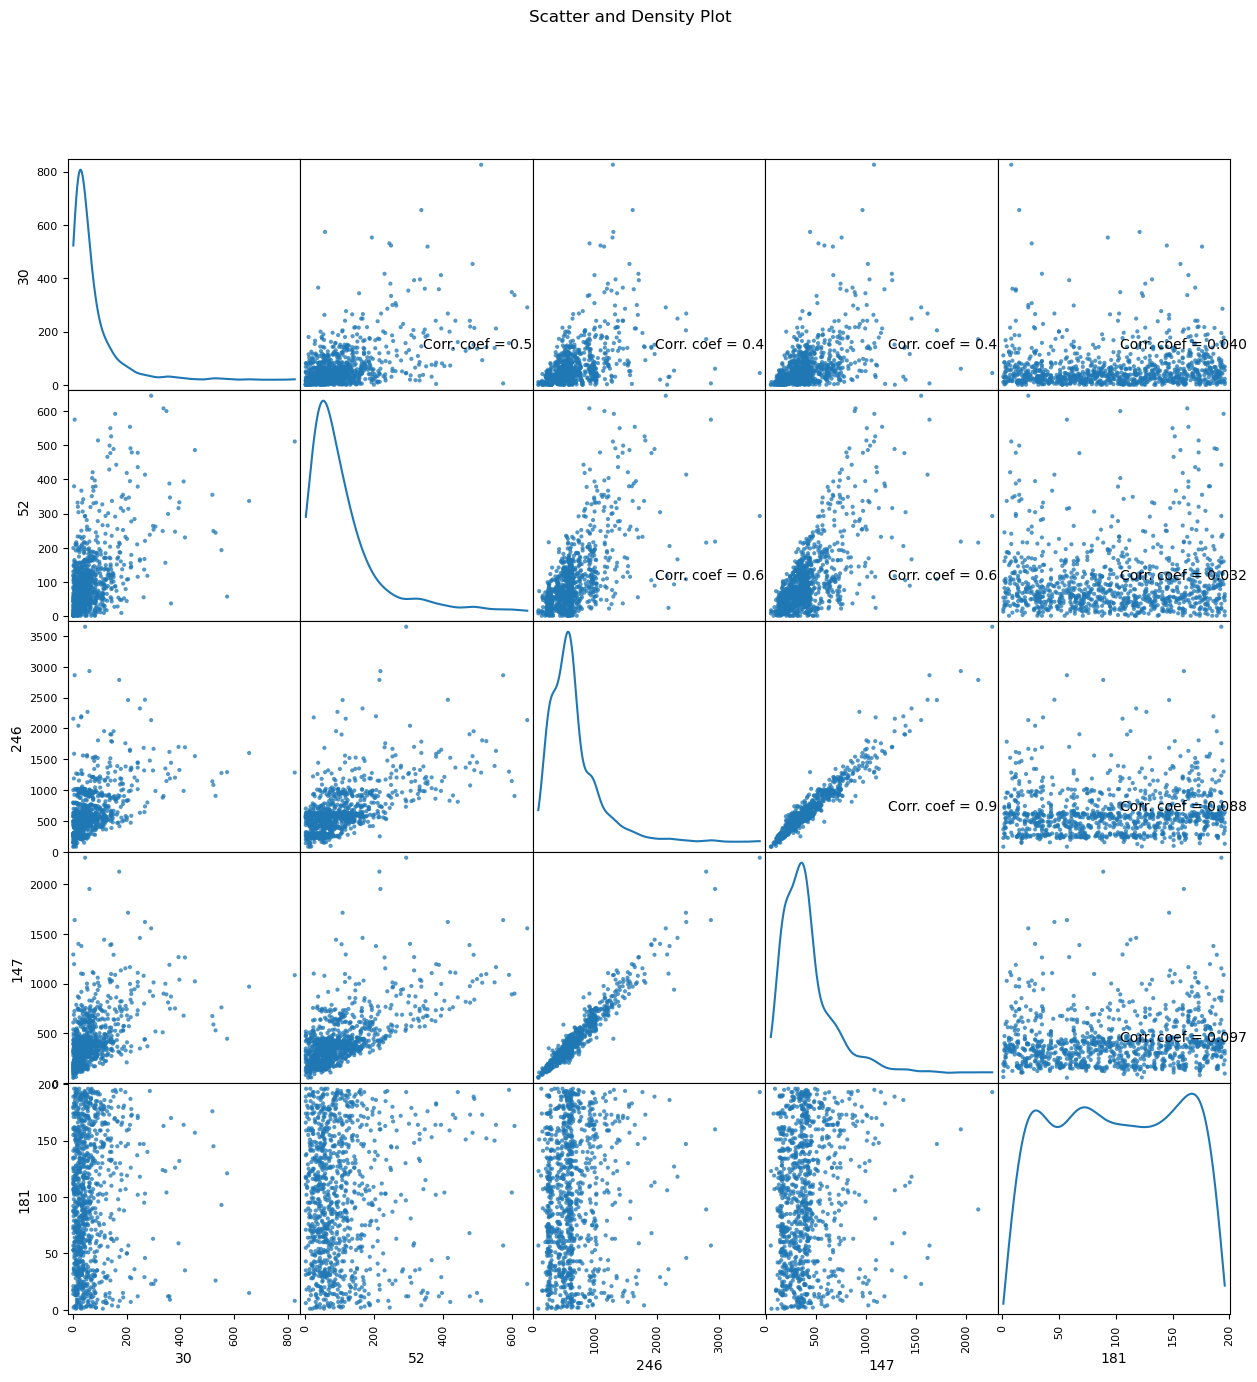

In [11]:
plotScatterMatrix(df1, 15, 10)

In [12]:
nRowsRead = 1000
#specify 'None' if want to read whole file anno_train.csv has 8144 rows in reality, but we are only loading/previewing the first 1000 rows
df2 = pd.read_csv('archive/anno_train.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'anno_train.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')


There are 1000 rows and 6 columns


In [13]:
df2.head(10)

,00001.jpg,39,116,569,375,14
0,00002.jpg,36,116,868,587,3
1,00003.jpg,85,109,601,381,91
2,00004.jpg,621,393,1484,1096,134
3,00005.jpg,14,36,133,99,106
4,00006.jpg,259,289,515,416,123
5,00007.jpg,88,80,541,397,89
6,00008.jpg,73,79,591,410,96
7,00009.jpg,20,126,1269,771,167
8,00010.jpg,21,110,623,367,58
9,00011.jpg,51,93,601,393,49


In [14]:
plotPerColumnDistribution(df2, 10, 5)

<Figure size 2400x512 with 0 Axes>

/tmp/ipykernel_27380/128494285.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN
/tmp/ipykernel_27380/128494285.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


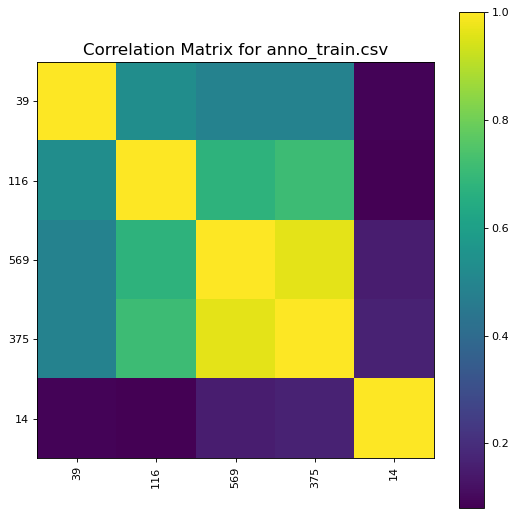

In [15]:
plotCorrelationMatrix(df2, 8)

/tmp/ipykernel_27380/2803739303.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


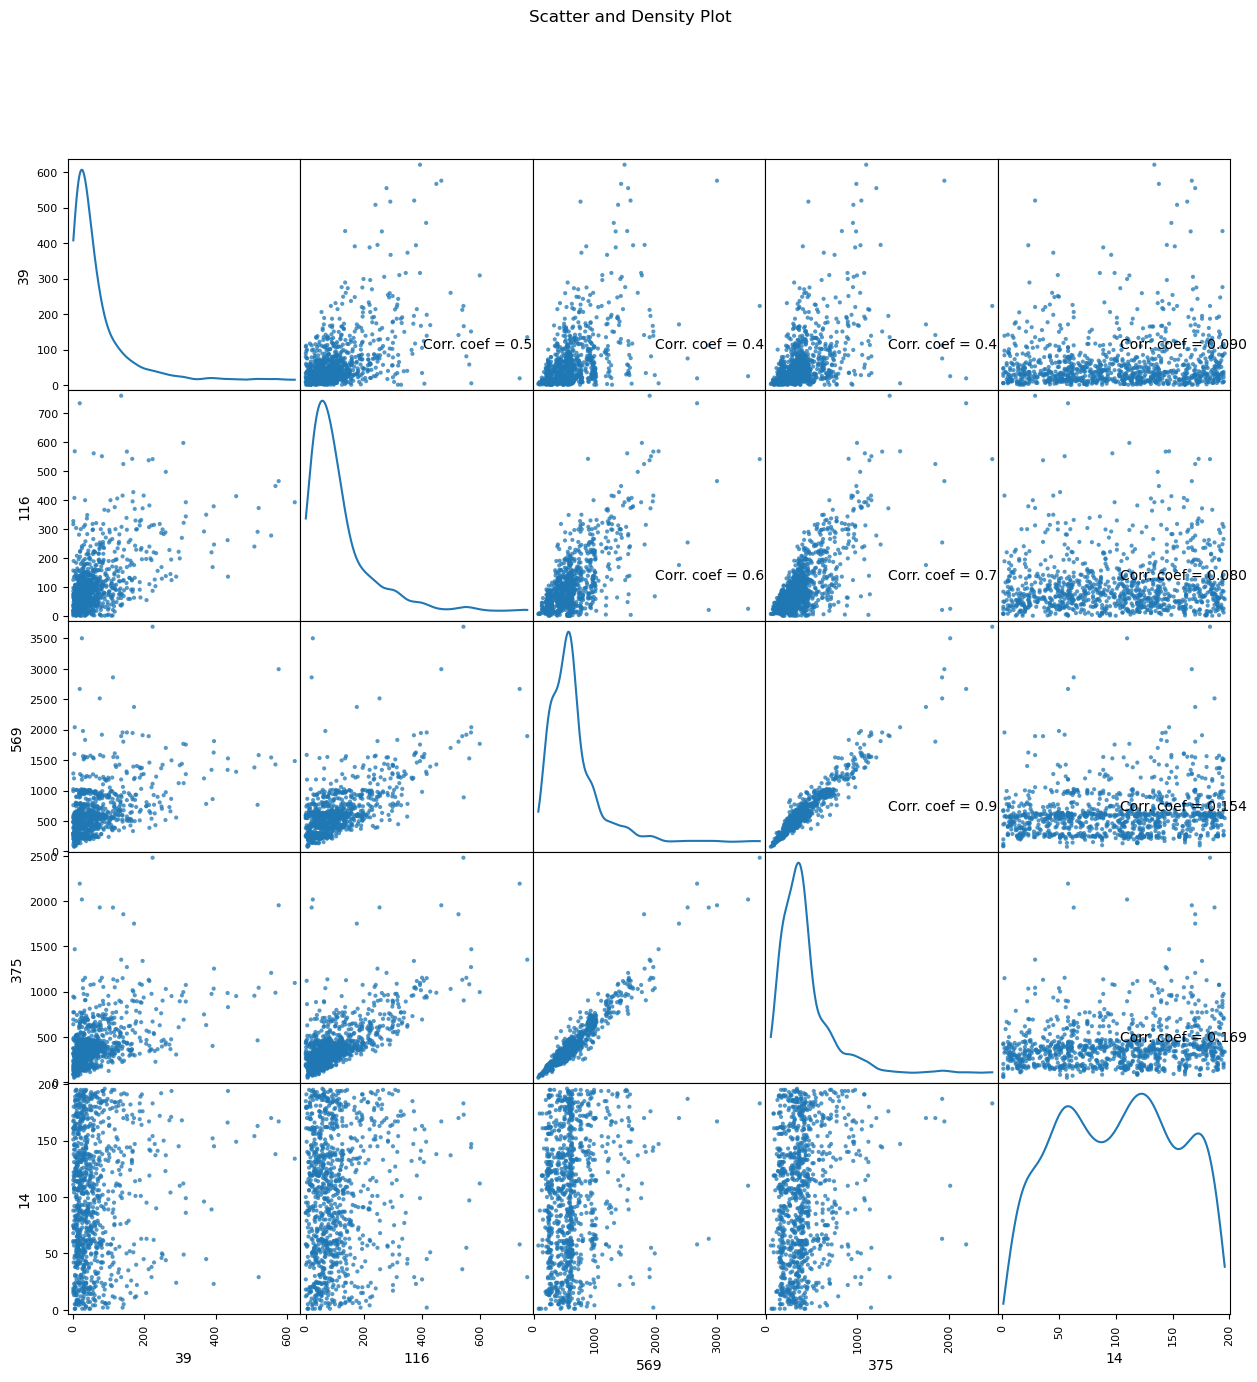

In [16]:
plotScatterMatrix(df2, 15, 10)

In [17]:
nRowsRead = 1000
df3 = pd.read_csv('archive/names.csv', delimiter=',', nrows = nRowsRead)
df3.dataframeName = 'names.csv'
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')


There are 195 rows and 1 columns


In [18]:
df3.head(10)

,AM General Hummer SUV 2000
0,Acura RL Sedan 2012
1,Acura TL Sedan 2012
2,Acura TL Type-S 2008
3,Acura TSX Sedan 2012
4,Acura Integra Type R 2001
5,Acura ZDX Hatchback 2012
6,Aston Martin V8 Vantage Convertible 2012
7,Aston Martin V8 Vantage Coupe 2012
8,Aston Martin Virage Convertible 2012
9,Aston Martin Virage Coupe 2012


In [19]:
plotPerColumnDistribution(df3, 10, 5)

<Figure size 2400x512 with 0 Axes>

In [20]:
import scipy.io as sio
import os

batch_size = 16
input_shape = (240,240)
data_dir='archive/car_data/car_data/'
train_dir = data_dir +'train'
test_dir = data_dir +'test'
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1. / 255,
    zoom_range=0.2,  
    rotation_range = 5,
    horizontal_flip=True)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1. / 255)

train_generator=train_datagen.flow_from_directory(train_dir,
                                            class_mode="categorical", 
                                            target_size=input_shape, 
                                            batch_size=batch_size)


validation_generator=test_datagen.flow_from_directory(test_dir,
                                            class_mode="categorical", 
                                            target_size=input_shape, 
                                            batch_size=batch_size)


Found 8144 images belonging to 196 classes.
Found 8041 images belonging to 196 classes.


In [21]:
from keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization
from keras import Model, optimizers
import efficientnet.keras as efn

base_model = efn.EfficientNetB0(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# fix the feature extraction part of the model
for layer in base_model.layers:
    if isinstance(layer, BatchNormalization):
        layer.trainable = True
    else:
        layer.trainable = False
        
model.compile(optimizer=optimizers.Adam(lr=0.01), loss='categorical_crossentropy', metrics=['acc'])
model.summary()



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 stem_conv (Conv2D)          (None, None, None, 32)       864       ['input_1[0][0]']             
                                                                                                  
 stem_bn (BatchNormalizatio  (None, None, None, 32)       128       ['stem_conv[0][0]']           
 n)                                                                                               
                                                                                                  
 stem_activation (Activatio  (None, None, None, 32)       0         ['stem_bn[0][0]']         

/tmp/ipykernel_27380/2186536814.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator,


Epoch 1/2
510/510 [==============================] - 1730s 3s/step - loss: 4.4418 - acc: 0.1373 - val_loss: 3.1494 - val_acc: 0.2996
Epoch 2/2
510/510 [==============================] - 1577s 3s/step - loss: 2.4026 - acc: 0.4710 - val_loss: 2.0743 - val_acc: 0.4978


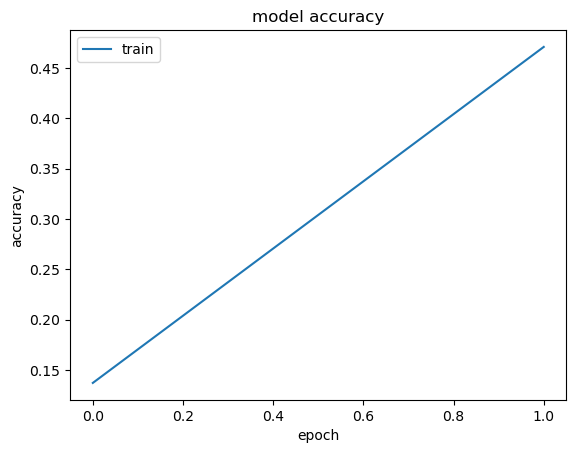

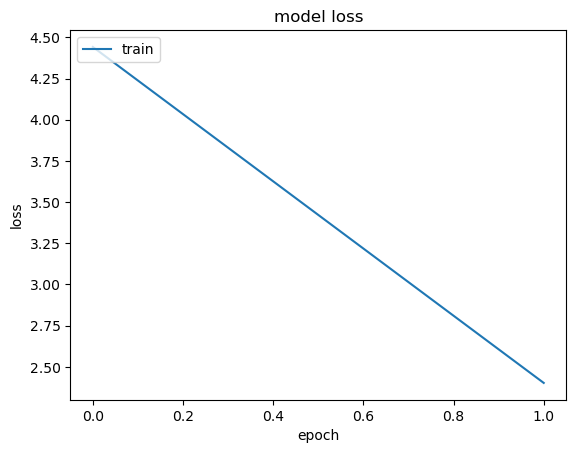

In [22]:
history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=train_generator.samples // batch_size + 1,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // batch_size + 1,
                    epochs=2,
                    workers=8,
                    max_queue_size=16,
                    verbose=1)

plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
batch_size = 8
train_generator=train_datagen.flow_from_directory(train_dir,
                                                class_mode="categorical",
                                                target_size=input_shape,
                                                batch_size=batch_size)

validation_generator=test_datagen.flow_from_directory(test_dir,
                                                class_mode="categorical",
                                                target_size=input_shape,
                                                batch_size=batch_size)
for layer in model.layers:
    layer.trainable = True

model.compile(optimizer=optimizers.SGD(lr=0.01), loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Found 8144 images belonging to 196 classes.
Found 8041 images belonging to 196 classes.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 stem_conv (Conv2D)          (None, None, None, 32)       864       ['input_1[0][0]']             
                                                                                                  
 stem_bn (BatchNormalizatio  (None, None, None, 32)       128       ['stem_conv[0][0]']           
 n)                                                                                               
                                                                                                  
 stem_activation (Activatio  (None, None, None, 32)       0         ['stem_bn[0][0]']         

Epoch 1/2


/tmp/ipykernel_27380/1280552790.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator,


1019/1019 [==============================] - 1884s 2s/step - loss: 1.5563 - acc: 0.6591 - val_loss: 1.4183 - val_acc: 0.6354
Epoch 2/2
1019/1019 [==============================] - 1819s 2s/step - loss: 1.1023 - acc: 0.7518 - val_loss: 1.0439 - val_acc: 0.7239


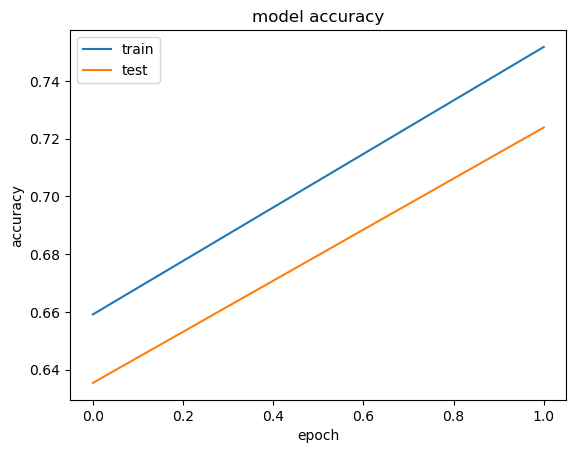

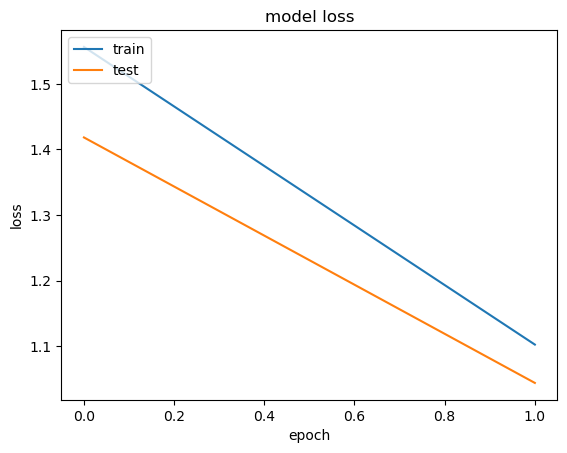

In [24]:
history = model.fit_generator(generator=train_generator,
                            steps_per_epoch=train_generator.samples // batch_size +1,
                            validation_data=validation_generator,
                            validation_steps=validation_generator.samples // batch_size + 1,
                            epochs=2,
                            workers=8,
                            max_queue_size=16,
                            verbose=1)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
